# napari integration
The napari-plugin [napari-cupy-image-processing](https://github.com/haesleinhuepf/napari-cupy-image-processing) allows to design image-processing workflows using cupy under the hood without the need to code. The user can use the [napari-assistant](https://github.com/haesleinhuepf/napari-assistant) to generate Python code that corresponds to a workflow that has been set up interactively. While this is convenient, the generated code needs to be tweaked to achieve optimal performance: memory transfer between CPU and GPU should be minimized. This notebook demonstrates this.

In [1]:
import napari_cupy_image_processing as ncupy

import cupy as cp
import numpy as np
from skimage.io import imread
from timeit import timeit
import stackview

In [2]:
image = imread("../../data/blobs.tif")

In case you call a napari-cupy operation and pass a numpy image, the image will be converted to a cupy array internally, sent to the GPU memory, processed and converted back to a numpy-like array afterwards. You can view the result in Jupyter immediately.

In [3]:
blurred = ncupy.gaussian_filter(image, sigma=5)

isinstance(blurred, np.ndarray)

True

StackViewNDArray([[ 36.21353885,  36.22345167,  36.28357235, ...,
                   232.83835771, 233.08381305, 233.16830308],
                  [ 36.3902598 ,  36.41238792,  36.49764346, ...,
                   232.77902787, 233.01809677, 233.10002388],
                  [ 36.73053611,  36.77715972,  36.91274797, ...,
                   232.64909629, 232.87572182, 232.95262568],
                  ...,
                  [ 66.68135601,  66.43282705,  65.95268772, ...,
                    49.48199612,  49.07162901,  48.87901225],
                  [ 67.28015349,  67.02471473,  66.53065261, ...,
                    49.59019787,  49.1541197 ,  48.94921481],
                  [ 67.60693398,  67.34745176,  66.84527899, ...,
                    49.64751227,  49.19744319,  48.98584682]])
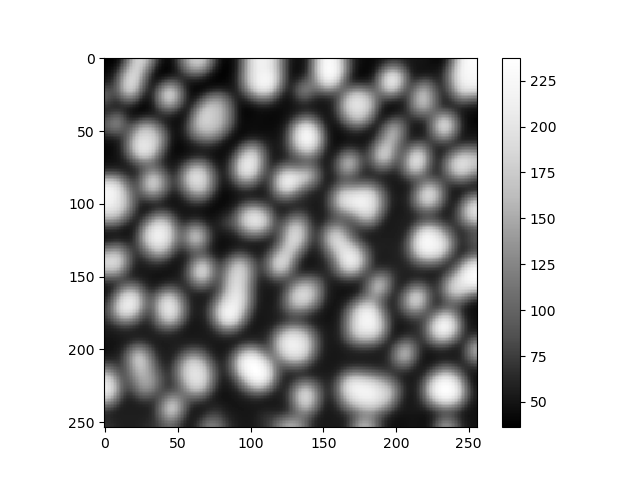
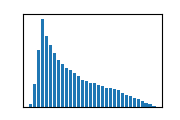

In [4]:
blurred

The back-and-forth conversion of numpy and cupy arrays is suboptimal when thinking of performance. It is desirable to convert the image to cupy once, run potentially many processing steps while keeping the image in GPU memory and by the end converting it back.

In [5]:
cp_image = cp.asarray(image)

isinstance(cp_image, np.ndarray)

False

Thus, if you pass a cupy-array to the function, you will also receive a cupy-image back. The conversion is not done in that case.

In [6]:
cp_blurred = ncupy.gaussian_filter(cp_image, sigma=5)

isinstance(cp_image, np.ndarray)

False

In [7]:
type(cp_blurred)

cupy.ndarray

## Exercise
Speed up the following image processing workflow. Make sure the image remains in GPU memory.

In [8]:
image = np.random.random((4000, 4000))

In [9]:
%%timeit
blurred = ncupy.gaussian_filter(image, sigma=5)
binary = blurred > 0.5
labels = ncupy.label(binary)

296 ms ± 31.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Run the _slow_ and the optimized code again with different image sizes, e.g. 0.1 MB, 1 MB, 10 MB,... What's the limit below which the optimization become negligible?